In [156]:
import numpy as np

In [157]:
energy_consumption = np.array([1200,3400,4000,5080])
print(f"energy consumption(in MWh) for different renewable sources:{energy_consumption}")

energy consumption(in MWh) for different renewable sources:[1200 3400 4000 5080]


In [158]:
total = np.sum(energy_consumption)
print(f"Total energy consumption(in MWh):{total}")

Total energy consumption(in MWh):13680


In [159]:
mean = np.mean(energy_consumption)
print(f"Mean energy consumption(in MWh):{mean}")

Mean energy consumption(in MWh):3420.0


In [160]:
avg = np.average(energy_consumption)
print(f"Average energy consumption(in MWh):{avg:.2f}")

Average energy consumption(in MWh):3420.00


In [161]:
sd = np.std(energy_consumption)
print(f"Standard deviation of energy consumption(in MWh):{sd:.2f}")

Standard deviation of energy consumption(in MWh):1416.05


In [162]:
#reshaping of array
reshape = energy_consumption.reshape(2,2)
print(f"Reshaped array:\n{reshape}")

Reshaped array:
[[1200 3400]
 [4000 5080]]


In [163]:
import pandas as pd

data = {
    "Energy Source": ["Solar", "Wind", "Hydropower", "Geothermal", "Biomass", "Nuclear"],
    "Energy Consumption (MWh)": [1200, np.nan, 2900, np.nan, 2500, 3200],
    "Cost (Million $)": [200, 400, np.nan, 150, 250, np.nan]
}

df = pd.DataFrame(data)
df.head()# gives top 5 rows or you can specify it



,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
1,Wind,NaN,400.0
2,Hydropower,2900.0,NaN
3,Geothermal,NaN,150.0
4,Biomass,2500.0,250.0


In [164]:
#missing value find
df.isnull()


,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,False,False,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,False,False
5,False,False,True


In [165]:
df.isnull().sum()

,0
Energy Source,0
Energy Consumption (MWh),2
Cost (Million $),2


In [166]:
#handling missing values
#1. drop method - dropna()
#2. impte methos - fillna()-mean,median,mode

clean = df.dropna()
clean

,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
4,Biomass,2500.0,250.0


In [167]:
df['Energy Consumption (MWh)'] = df['Energy Consumption (MWh)'].fillna(df['Energy Consumption (MWh)'].mean())
df['Cost (Million $)']=df['Cost (Million $)'].fillna(df['Cost (Million $)'].median())
df

,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
1,Wind,2450.0,400.0
2,Hydropower,2900.0,225.0
3,Geothermal,2450.0,150.0
4,Biomass,2500.0,250.0
5,Nuclear,3200.0,225.0


In [168]:
df['Cost per MWh'] = (df['Energy Consumption (MWh)'] / df['Cost (Million $)'])
df
display(df)

,Energy Source,Energy Consumption (MWh),Cost (Million $),Cost per MWh
0,Solar,1200.0,200.0,6.000000
1,Wind,2450.0,400.0,6.125000
2,Hydropower,2900.0,225.0,12.888889
3,Geothermal,2450.0,150.0,16.333333
4,Biomass,2500.0,250.0,10.000000
5,Nuclear,3200.0,225.0,14.222222


In [169]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Energy Consumption (MWh)','Cost (Million $)']] = scaler.fit_transform(df[['Energy Consumption (MWh)','Cost (Million $)']])
display(df)

,Energy Source,Energy Consumption (MWh),Cost (Million $),Cost per MWh
0,Solar,0.000,0.2,6.000000
1,Wind,0.625,1.0,6.125000
2,Hydropower,0.850,0.3,12.888889
3,Geothermal,0.625,0.0,16.333333
4,Biomass,0.650,0.4,10.000000
5,Nuclear,1.000,0.3,14.222222


In [170]:
#standardization - z score method - standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Energy Consumption (MWh)','Cost (Million $)']] = scaler.fit_transform(df[['Energy Consumption (MWh)','Cost (Million $)']])
display(df)

,Energy Source,Energy Consumption (MWh),Cost (Million $),Cost per MWh
0,Solar,-2.005893e+00,-0.539164,6.000000
1,Wind,3.563181e-16,2.048823,6.125000
2,Hydropower,7.221213e-01,-0.215666,12.888889
3,Geothermal,3.563181e-16,-1.186161,16.333333
4,Biomass,8.023570e-02,0.107833,10.000000
5,Nuclear,1.203536e+00,-0.215666,14.222222


In [171]:
#OHE
encoded = pd.get_dummies(df,columns=['Energy Source'],dtype=int)
encoded

,Energy Consumption (MWh),Cost (Million $),Cost per MWh,Energy Source_Biomass,Energy Source_Geothermal,Energy Source_Hydropower,Energy Source_Nuclear,Energy Source_Solar,Energy Source_Wind
0,-2.005893e+00,-0.539164,6.000000,0,0,0,0,1,0
1,3.563181e-16,2.048823,6.125000,0,0,0,0,0,1
2,7.221213e-01,-0.215666,12.888889,0,0,1,0,0,0
3,3.563181e-16,-1.186161,16.333333,0,1,0,0,0,0
4,8.023570e-02,0.107833,10.000000,1,0,0,0,0,0
5,1.203536e+00,-0.215666,14.222222,0,0,0,1,0,0


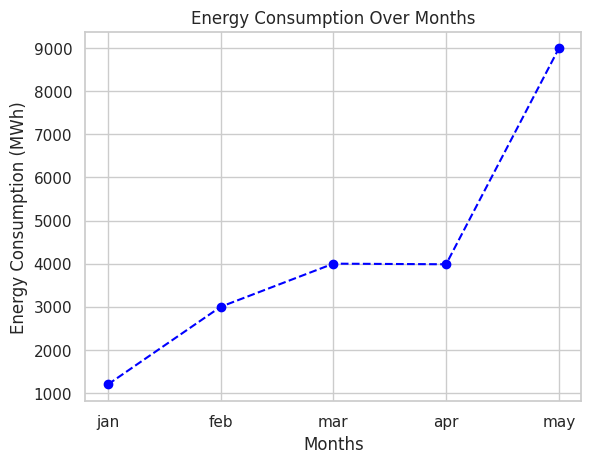

In [172]:
#visualization
#line plot
import matplotlib.pyplot as plt
months = ['jan', 'feb', 'mar', 'apr', 'may']
energy_con = [1200,3000,4000,3986,8989]
plt.plot(months,energy_con,marker='o',linestyle='dashed',color='blue')
plt.title('Energy Consumption Over Months')
plt.xlabel('Months')
plt.ylabel('Energy Consumption (MWh)')
plt.grid(True)
plt.show()

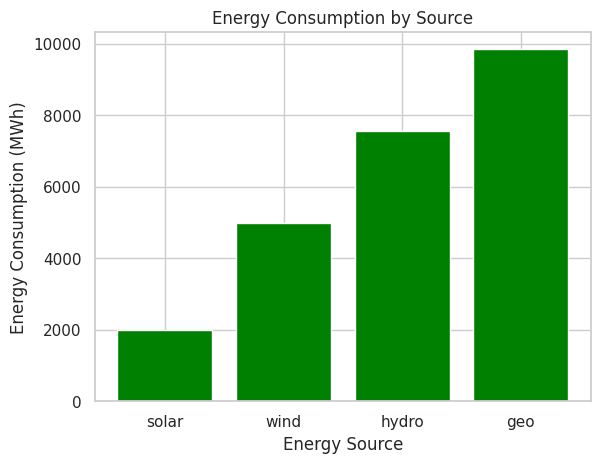

In [173]:
#bar plot
energy_sources = ['solar', 'wind','hydro','geo']
values = [2000,4988,7544,9843]
plt.bar(energy_sources,values,color='green')
plt.title('Energy Consumption by Source')
plt.xlabel('Energy Source')
plt.ylabel('Energy Consumption (MWh)')
plt.show()

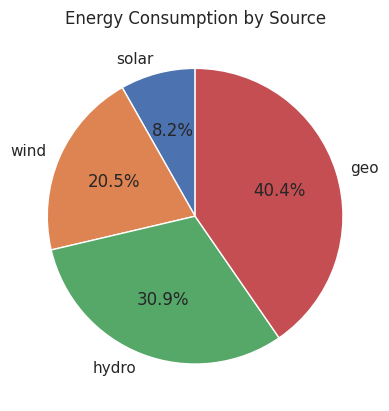

In [174]:
#pie chart
plt.pie(values,labels=energy_sources,autopct='%1.1f%%',startangle=90)
plt.title('Energy Consumption by Source')
plt.show()

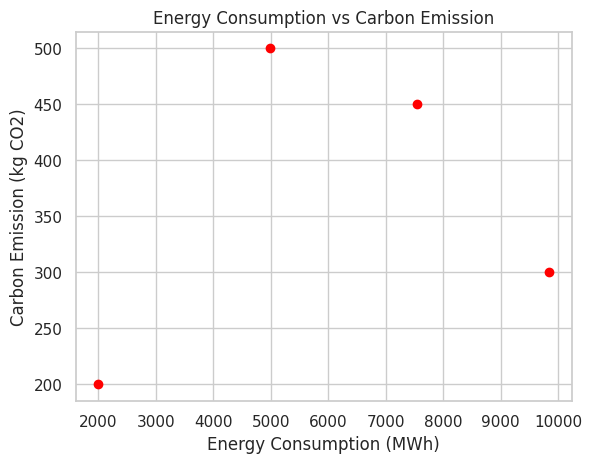

In [175]:
#scatter plot
carbon_emission = [200,500,450,300] #in kg co2 # Added a placeholder value to match the length of energy_con
plt.scatter(values,carbon_emission,color='red')
plt.title('Energy Consumption vs Carbon Emission')
plt.xlabel('Energy Consumption (MWh)')
plt.ylabel('Carbon Emission (kg CO2)')
plt.show()

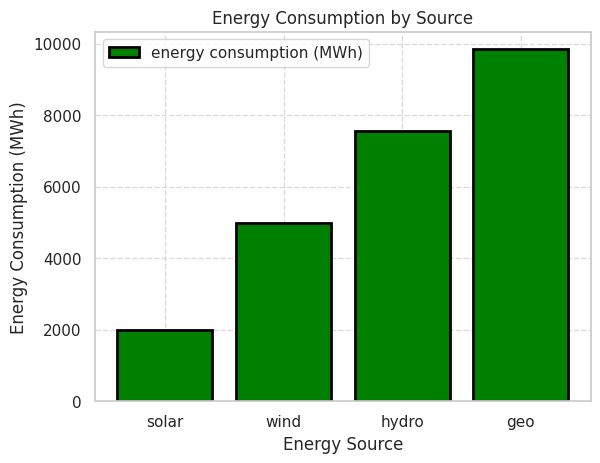

In [176]:
#customization for bar plot
import matplotlib.pyplot as plt
plt.bar(energy_sources,values,color='green',edgecolor='black',linewidth=2)
plt.title('Energy Consumption by Source')
plt.xlabel('Energy Source')
plt.ylabel('Energy Consumption (MWh)')
plt.grid(True,linestyle='--',alpha=0.7)
plt.legend(['energy consumption (MWh)'],loc='upper left')
plt.show()

In [177]:
#seaborn
import seaborn as sns
data={
    'solar':[1003,2006,4003,3007],
    'wind':[2000,4988,7544,9843],
    'hydro':[2900,9885,7944,9043],
    'geo':[7840,1328,7864,2233]
}

df = pd.DataFrame(data)
df



,solar,wind,hydro,geo
0,1003,2000,2900,7840
1,2006,4988,9885,1328
2,4003,7544,7944,7864
3,3007,9843,9043,2233


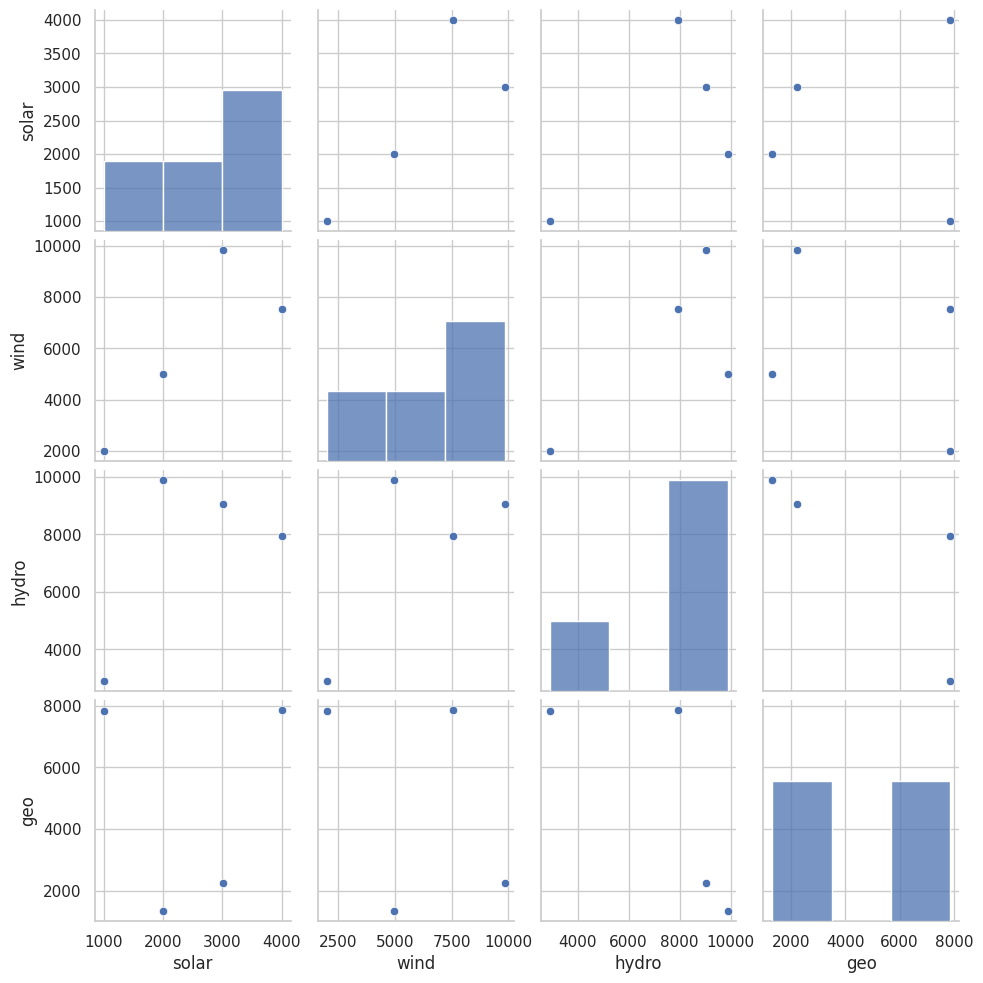

In [178]:
#pairplot
sns.pairplot(df)
plt.show()

In [179]:
#correlation matrix
corr = df.corr()
corr

,solar,wind,hydro,geo
solar,1.000000,0.823089,0.590249,0.034257
wind,0.823089,1.000000,0.713901,-0.386472
hydro,0.590249,0.713901,1.000000,-0.750860
geo,0.034257,-0.386472,-0.750860,1.000000


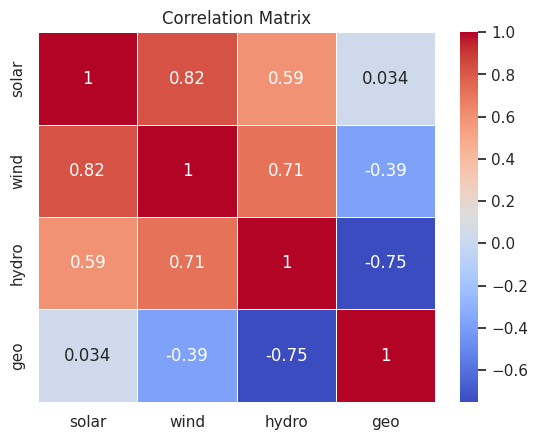

In [180]:
#heatmap
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

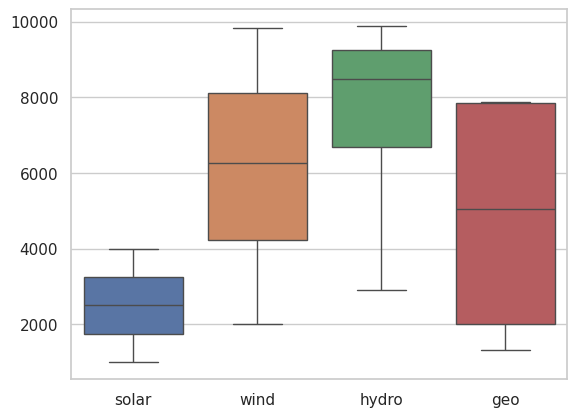

In [181]:
sns.boxplot(data=df)
plt.show()

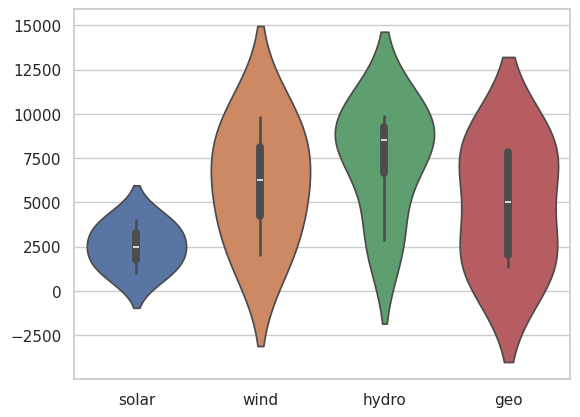

In [182]:
#violin plot
sns.violinplot(data=df)
plt.show()

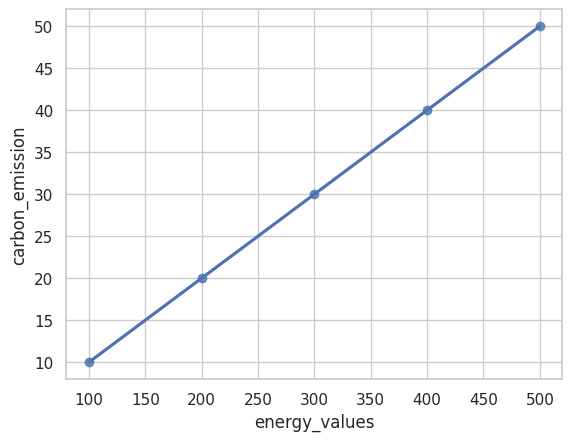

In [186]:
#regression plot
energy_values = [100,200,300,400,500]
carbon_emission = [10,20,30,40,50]
df = pd.DataFrame({'energy_values':energy_values,'carbon_emission':carbon_emission})
sns.regplot(x='energy_values',y='carbon_emission',data=df)
plt.show()